# Otimização da Alocação de Motoristas de Táxi: Um Modelo de Previsão de Pedidos em Tempo Real

## Introdução

A Sweet Lift Taxi é uma empresa que coletou um conjunto de dados históricos sobre os pedidos de táxi feitos em aeroportos. Com o objetivo de atrair mais motoristas durante os horários de pico, a empresa deseja desenvolver um modelo de previsão que seja capaz de estimar a quantidade de pedidos de táxi para a próxima hora.

O principal desafio desse projeto é construir um modelo de previsão preciso, e a métrica-chave a ser alcançada é o REQM (Root Mean Squared Error), que deve ser mantido abaixo de 48 no conjunto de teste.

Em resumo, o projeto visa criar um modelo capaz de prever a demanda de táxis com alta precisão, permitindo que a Sweet Lift Taxi otimize seus recursos e forneça um serviço eficiente aos clientes durante os horários de maior demanda nos aeroportos.

###  Roteiro do Projeto

2. Inicialização

- Importar bibliotecas importantes.
- Ler o arquivo `taxi.csv` e armazenar os dados em um dataframe.

3. Análise Exploratória de Dados (AED)
- Verificar as informações gerais do conjunto de dados, como número de entradas, tipos de dados, duplicatas, valores únicos, data mínima e máxima.
- Realizar uma análise exploratória dos dados, incluindo a visualização da série temporal e a decomposição dos componentes de tendência, sazonalidade e resíduos.

4.  Pré-Processamento de Dados

- Reamostrar os dados para diferentes granularidades, como hora (objetivo), dia, semana e mês.
- Calcular a média móvel para suavizar a série temporal.
- Verificar a estacionariedade da série temporal e realizar diferenciação, se necessário.
- Criar características relevantes, como características de calendário, defasagens e médias móveis.

5. Divisão do Conjunto de Dados

- Dividir os dados em conjuntos de treinamento validação e teste, com o conjunto de teste representando 10% do conjunto de dados inicial.

6. Treinamento dos Modelos

- Treinamos diferentes modelos de previsão de séries temporais:
    
- Regressão Linear
    - Treinar um modelo de Regressão Linear para prever a demanda de táxi.
    - Avaliar o modelo usando RMSE.

- Árvore de Decisão
    - Treinar um modelo de Árvore de Decisão para prever a demanda de táxi.
    - Avaliar o modelo usando RMSE.

- ARIMA (Modelo Autorregressivo Integrado de Médias Móveis)

    - Treinar um modelo ARIMA para prever a demanda de táxi.
    - Avaliar o modelo usando RMSE.

- Ajuste de Hiperparâmetros
    - Se necessário, ajustar os hiperparâmetros dos modelos para melhorar o desempenho.

7. Testando os Modelos
    - Testar cada modelo usando o conjunto de teste.
    - Calcular o RMSE para cada modelo.

- Comparação de Modelos
    - Comparar os resultados dos diferentes modelos para determinar qual tem o melhor desempenho.

8. Conclusão
    - Resumir as principais conclusões do projeto.
    - Identificar o modelo com melhor desempenho.
    - Destacar a importância das características criadas e do pré-processamento de dados.
    - Compartilhar quaisquer observações interessantes ou desafios enfrentados durante o projeto.

## Inicialização


In [1]:
# Importar bibliotecas importantes
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
import random
from itertools import product
import itertools
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# Ler o arquivo taxi.csv e armazenar os dados no dataframe df
#df = pd.read_csv('/datasets/taxi.csv', parse_dates=[0])
df = pd.read_csv(r'D:\GitHub\taxi_driver_allocation_optimization\data\taxi.csv', parse_dates=[0])

 ## Análise Exploratória dos dados - AED 

In [3]:
# amostra inicial sobre o conjunto de dados df
df.head(10) 

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32
5,2018-03-01 00:50:00,21
6,2018-03-01 01:00:00,7
7,2018-03-01 01:10:00,5
8,2018-03-01 01:20:00,17
9,2018-03-01 01:30:00,12


In [4]:
# informações gerais/resumidas sobre o conunto de dados
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


In [5]:
# conjunto de estatisticas quantitativas comuns sobre o conjunto de dados df
df.describe()

,datetime,num_orders
count,26496,26496.000000
mean,2018-05-31 23:55:00,14.070463
min,2018-03-01 00:00:00,0.000000
25%,2018-04-15 23:57:30,8.000000
50%,2018-05-31 23:55:00,13.000000
75%,2018-07-16 23:52:30,19.000000
max,2018-08-31 23:50:00,119.000000
std,NaN,9.211330


In [6]:
# duplicatas claras sobre o conjunto de dados de df 
df.duplicated().sum()

0

In [7]:
# duplicatas implícitas sobre o conjunto de dados df
df.duplicated().any()

False

In [8]:
# valores únicos sobre o conjunto de dados df
df.nunique() 

datetime      26496
num_orders       81
dtype: int64

In [9]:
# Encontrar a data máxima e a data mínima
data_maxima = df['datetime'].max()
data_minima = df['datetime'].min()

In [10]:
print("Data Mínima:", data_minima)
print("Data Máxima:", data_maxima)

Data Mínima: 2018-03-01 00:00:00
Data Máxima: 2018-08-31 23:50:00


**Conclusões intermédiarias**

O conjunto de dados possui duas colunas

- Amostra Inicial dos Dados: Analisamos as 10 primeiras linhas do conjunto de dados para obter uma visão preliminar das informações. A coluna `datetime` indica o intervalo de tempo em que os pedidos de táxi foram registrados, enquanto a coluna `num_orders` representa a quantidade de pedidos realizados durante aquele período específico.

- Informações Gerais do Conjunto de Dados: O conjunto de dados possui um total de 26.496 entradas.

- Estatísticas Descritivas: Com um total de 26.496 observações, a média de pedidos é de aproximadamente 14, indicando uma tendência central moderada. A dispersão dos dados é evidente pelo desvio padrão de cerca de 9,21, sugerindo uma certa variabilidade nas quantidades de pedidos. A faixa das contagens de pedidos é de 0 a 119, com um valor mínimo de 0 e um valor máximo de 119.

- Duplicatas: Verificamos a existência de duplicatas no conjunto de dados, tanto claras quanto implícitas. Felizmente, não encontramos nenhuma duplicata.

- Valores Únicos: Descobrimos que existem 26.496 valores únicos que indicam que cada linha é unica na coluna `datetime` e 81 valores únicos na coluna `num_orders`.

- Data Mínima e Máxima: Encontramos a data mínima `(2018-03-01 00:00:00)` e a data máxima `(2018-08-31 23:50:00)` presentes no conjunto de dados. 

## Pré-Processamento dos dados

#### Verificação inicial

In [11]:
# Ordena o DataFrame pelo datetime
df = df.sort_values(by='datetime')

In [12]:
# Define a coluna "datetime" como o índice do DataFrame
df.set_index('datetime', inplace=True)

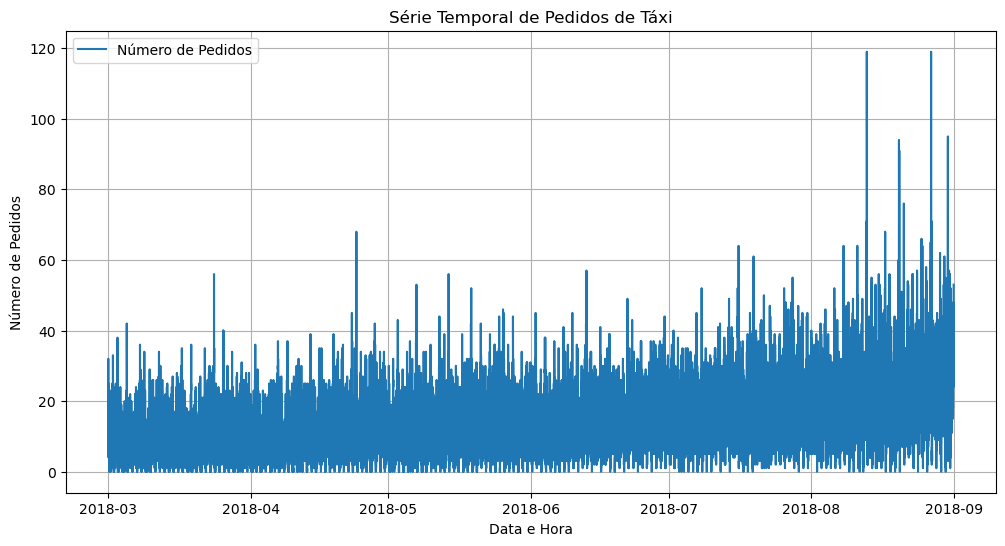

In [13]:
# Gráfico inicial da série temporal de num_orders
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['num_orders'], label='Número de Pedidos')
plt.title('Série Temporal de Pedidos de Táxi')
plt.xlabel('Data e Hora')
plt.ylabel('Número de Pedidos')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

#### Reamostragem

A etapa de reamostragem desempenha um papel fundamental na preparação dos dados para a análise de séries temporais. Neste projeto, aplicamos a reamostragem com o objetivo de alterar a granularidade dos dados, tornando-os mais adequados às nossas necessidades de modelagem. A granularidade representa a unidade de tempo em que os dados são agrupados. As principais reamostragens realizadas incluíram:

- Granularidade Horária.
- Granularidade Diária.
- Granularidade Semanal. 
- Gramiçarodade Mensal.

In [14]:
# Reamostra os dados para uma granularidade especificada.
df_hourly = df.resample('1H').sum() # Granularidade de 1 hora - principal
df_daily = df['num_orders'].resample('D').sum()  # Granularidade diária
df_weekly = df['num_orders'].resample('W').sum()  # Granularidade semanal
df_monthly = df['num_orders'].resample('M').sum()  # Granularidade mensal

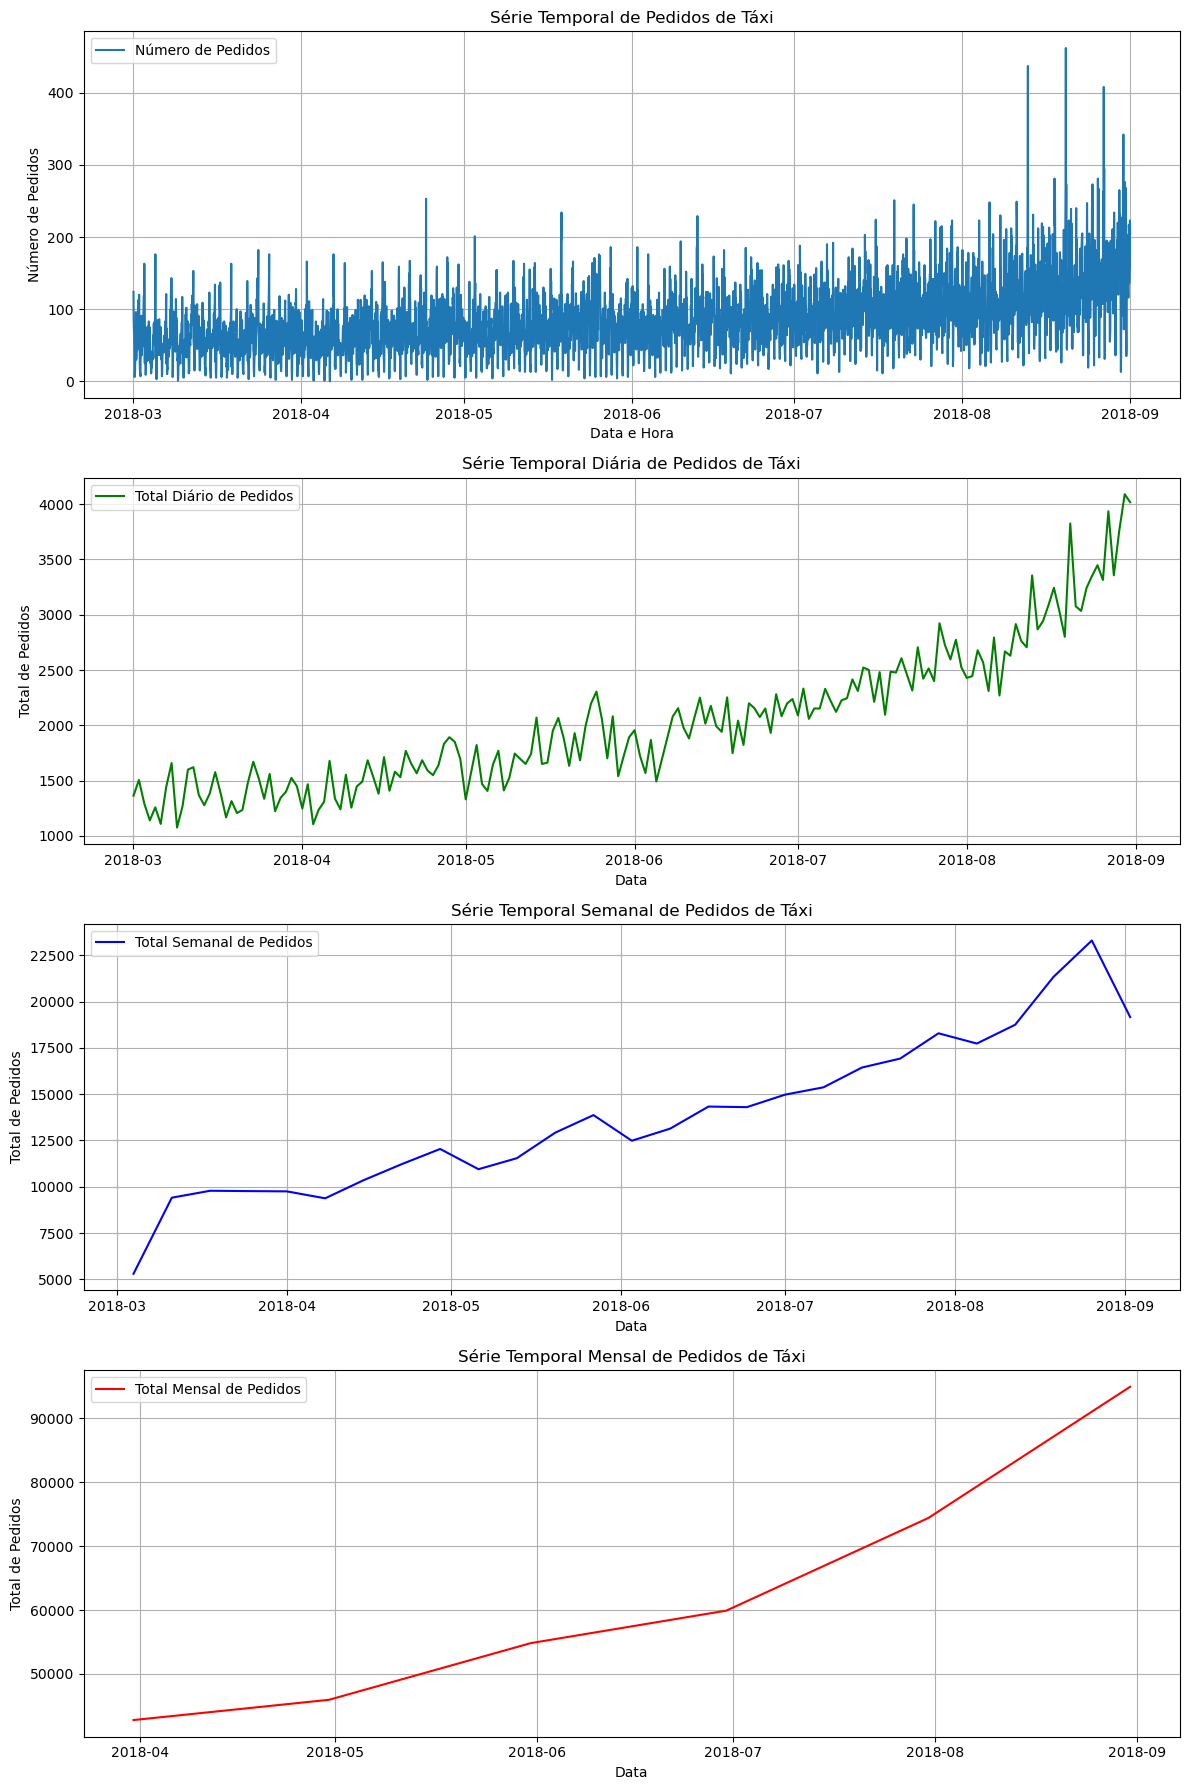

In [15]:
# Criar gráficos de linhas para visualizar as séries temporais
plt.figure(figsize=(12, 18))

# Gráfico inicial da série temporal
plt.subplot(411)
plt.plot(df_hourly.index, df_hourly['num_orders'], label='Número de Pedidos')
plt.title('Série Temporal de Pedidos de Táxi')
plt.xlabel('Data e Hora')
plt.ylabel('Número de Pedidos')
plt.legend(loc='upper left')
plt.grid(True)

# Gráfico diário
plt.subplot(412)
plt.plot(df_daily.index, df_daily.values, label='Total Diário de Pedidos', color='green')
plt.title('Série Temporal Diária de Pedidos de Táxi')
plt.xlabel('Data')
plt.ylabel('Total de Pedidos')
plt.legend(loc='upper left')
plt.grid(True)

# Gráfico semanal
plt.subplot(413)
plt.plot(df_weekly.index, df_weekly.values, label='Total Semanal de Pedidos', color='blue')
plt.title('Série Temporal Semanal de Pedidos de Táxi')
plt.xlabel('Data')
plt.ylabel('Total de Pedidos')
plt.legend(loc='upper left')
plt.grid(True)

# Gráfico mensal
plt.subplot(414)
plt.plot(df_monthly.index, df_monthly.values, label='Total Mensal de Pedidos', color='red')
plt.title('Série Temporal Mensal de Pedidos de Táxi')
plt.xlabel('Data')
plt.ylabel('Total de Pedidos')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

**Conclusões intermediárias**

A visualização das séries temporais resultantes é apresentada nos gráficos acima. A série temporal original, bem como as séries reamostradas, fornecem diferentes perspectivas sobre os dados e nos ajudam a compreender melhor os padrões subjacentes. Através dessas análises, poderemos selecionar a granularidade mais apropriada para a modelagem, que é a horária, e ajustar os modelos de acordo com as características observadas em cada nível de granularidade.

A reamostragem é uma etapa crucial na preparação de dados para análises de séries temporais, pois permite que exploremos e entendamos melhor a dinâmica da demanda de táxi ao longo do tempo, preparando o terreno para a criação de modelos preditivos.

#### Média móvel 

A técnica de média móvel é uma ferramenta valiosa em análises de séries temporais que nos permite suavizar os dados e identificar tendências subjacentes com mais clareza. Neste projeto, aplicamos a média móvel com uma janela de 7 dias aos dados diários de pedidos de táxi.

In [16]:
# Calcula a média móvel para 7 dias
rolling_mean = df_daily.rolling(window=7).mean()
df['rolling_mean'] = df['num_orders'].rolling(10).mean()

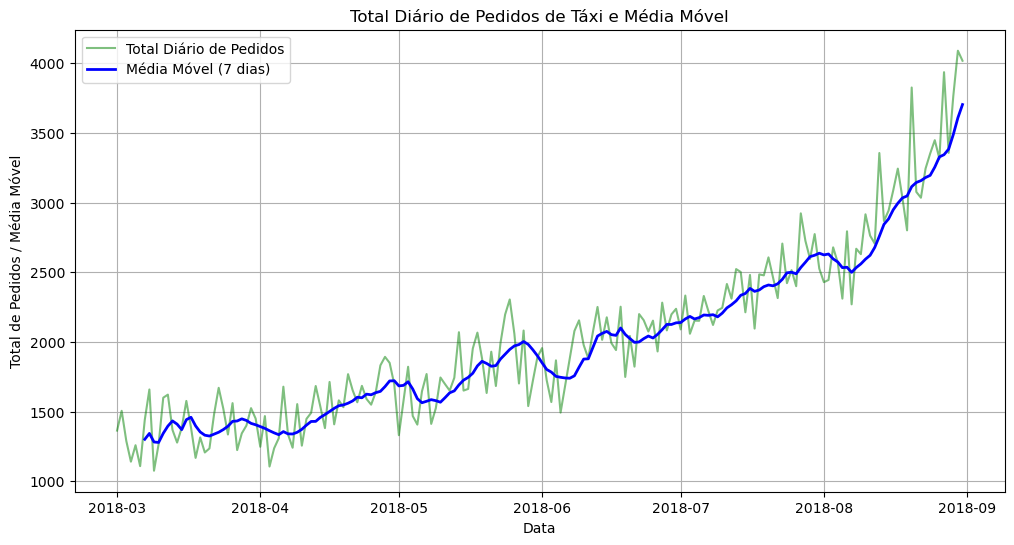

In [17]:
# Cria um gráfico da média móvel
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily.values, label='Total Diário de Pedidos', color='green', alpha=0.5)
plt.plot(rolling_mean.index, rolling_mean.values, label='Média Móvel (7 dias)', color='blue', linewidth=2)
plt.title('Total Diário de Pedidos de Táxi e Média Móvel')
plt.xlabel('Data')
plt.ylabel('Total de Pedidos / Média Móvel')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


**Conclusões intermediárias**

Através da aplicação da média móvel podemos realizar:
    
- Suavização de Dados: A média móvel atua como um filtro que suaviza as flutuações nos dados originais. Isso é particularmente útil para remover o ruído aleatório, tornando os padrões de demanda mais visíveis.

- Identificação de Tendências: A média móvel nos ajudou a identificar tendências de alta nos pedidos de taxi ao longo do tempo avaliado, a linha da "Média Móvel (7 dias)" é menos volátil do que a série temporal diária, tornando mais fácil identificar a tendência ascendente.

#### Têndencias e sazonalidade

A análise de tendências e sazonalidade é uma parte essencial da exploração de séries temporais, pois nos ajuda a identificar padrões repetitivos e entender a direção geral dos dados. Nesta seção, realizamos a decomposição da série temporal diária de pedidos de táxi em três componentes principais: tendência, sazonalidade e resíduos. A seguir, destacamos os principais conceitos e insights dessa etapa:

In [18]:
# Realizar a decomposição da série temporal
decomposed = seasonal_decompose(df_daily, model='additive')

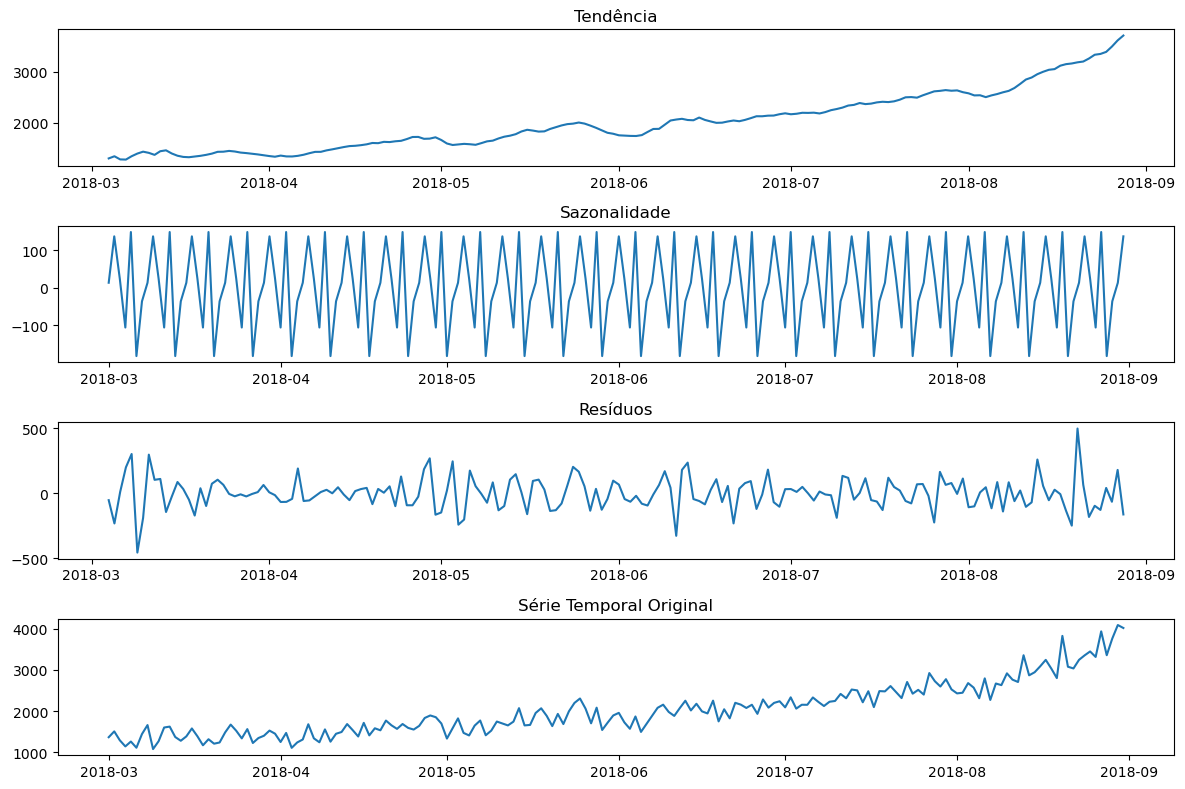

In [19]:
# Plotar os componentes da decomposição
plt.figure(figsize=(12, 8))

# Componente de tendência
plt.subplot(411)
plt.plot(decomposed.trend)
plt.title('Tendência')

# Componente de sazonalidade
plt.subplot(412)
plt.plot(decomposed.seasonal)
plt.title('Sazonalidade')

# Componente de resíduos (ruído)
plt.subplot(413)
plt.plot(decomposed.resid)
plt.title('Resíduos')

# Série temporal original
plt.subplot(414)
plt.plot(df_daily)
plt.title('Série Temporal Original')

plt.tight_layout()
plt.show()


**Conclusões intermediárias**

- Tendência: O componente de tendência nos mostra a direção geral dos dados ao longo do tempo, indicando se a série temporal está aumentando, diminuindo ou permanecendo estável. No gráfico apresentado acima, a primeira subfigura representa a tendência da série temporal de pedidos de táxi. É possível observar se há uma tendência de aumento ou diminuição na demanda ao longo do período analisado.

- Sazonalidade: A sazonalidade refere-se a padrões que se repetem em intervalos fixos, geralmente associados a eventos sazonais ou ciclos naturais. A segunda subfigura exibe a componente de sazonalidade da série. Isso nos permite identificar variações regulares nos pedidos de táxi, como picos de demanda em determinados dias da semana ou meses do ano.

- Resíduos (Ruído): Os resíduos representam a parte não explicada pelos componentes de tendência e sazonalidade. Essa é a parte estocástica ou aleatória da série temporal. A terceira subfigura mostra os resíduos, que devem ser examinados quanto à presença de padrões não identificados ou comportamento errático.

A decomposição da série temporal é fundamental para entender a estrutura dos dados e identificar fatores que afetam a demanda por serviços de táxi. Esses insights podem ser usados para criar modelos mais precisos de previsão, levando em consideração tanto a tendência quanto a sazonalidade.

A quarta subfigura no gráfico apresenta a série temporal original de pedidos de táxi, permitindo a comparação visual com os componentes decompostos.

A partir dessa análise, estamos mais preparados para explorar os padrões subjacentes e construir modelos que capturem a dinâmica da demanda por serviços de táxi ao longo do tempo.

#### Séries estacionárias

Uma série temporal estacionária desempenha um papel fundamental na análise de séries temporais, pois muitos modelos de previsão de séries temporais assumem que os dados são estacionários. Uma série temporal é considerada estacionária quando suas propriedades estatísticas, como média e variância, não mudam com o tempo. Para avaliar a estacionariedade da nossa série temporal de pedidos de táxi, realizaremos testes estatísticos e examinamos segmentos específicos da série.

In [20]:
# Defina o período de  a partir de 2018-03-01 00:00:00
inicio = '2018-03-01 00:00:00'
fim = '2018-08-31 23:59:59'

In [21]:
# Extraia a coluna 'num_orders' para fazer o teste ADF
serie_temporal = df['num_orders']

In [22]:
# Realize o teste ADF
result = adfuller(serie_temporal)


In [23]:
# Imprima o resultado do teste
print('Estatística ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:', result[4])

Estatística ADF: -12.548885000267527
Valor p: 2.2286378815481225e-23
Valores críticos: {'1%': -3.430597284562216, '5%': -2.861649292553069, '10%': -2.566828173184574}


In [24]:
# Compare a estatística ADF com os valores críticos para determinar a estacionariedade
if result[0] < result[4]['5%']:
    print('A série temporal é estacionária.')
else:
    print('A série temporal não é estacionária.')

A série temporal é estacionária.


Analisando para 1 dia

In [25]:
# Defina o período de 1 dia a partir de 2018-03-01 00:00:00
inicio = '2018-03-01 00:00:00'
fim = '2018-03-01 23:59:59'

In [26]:
# Seleção usando o índice (datetime)
df_1d = df.loc[inicio:fim]

In [27]:
# Verifica se a série temporal é estacionária
result = adfuller(df_1d['num_orders'])

In [28]:
# Imprime o resultado do teste
print('Estatística ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:', result[4])

Estatística ADF: -5.3969331875200375
Valor p: 3.4378056881012304e-06
Valores críticos: {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}


In [29]:
# Compara a estatística ADF com os valores críticos para determinar a estacionariedade
if result[0] < result[4]['5%']:
    print('A série temporal é estacionária.')
else:
    print('A série temporal não é estacionária.')

A série temporal é estacionária.


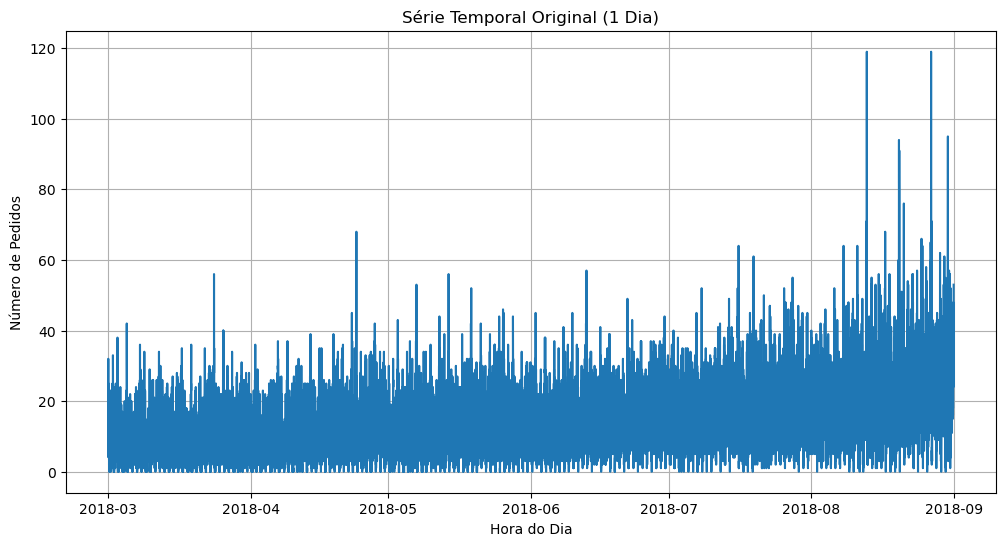

In [30]:
# Plote a série temporal original
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal)
plt.title('Série Temporal Original (1 Dia)')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.show()

**Conclusões intermediárias**

- Teste ADF (Augmented Dickey-Fuller): O primeiro teste realizado foi o Teste ADF, uma técnica estatística amplamente usada para determinar a estacionariedade em séries temporais. O teste ADF compara a estatística ADF calculada com valores críticos em diferentes níveis de significância. Se a estatística ADF for menor do que os valores críticos, podemos rejeitar a hipótese nula de que a série não é estacionária. Neste caso, a estatística ADF (-12.55) foi muito menor do que o valor crítico de 5% (-2.86), indicando que a série temporal como um todo é estacionária.

- Análise Diária: Também realizamos uma análise de estacionariedade em uma escala diária, focando em um dia específico (1º de março de 2018). O teste ADF aplicado a esse período específico também indicou que a série era estacionária, com uma estatística ADF de -5.40, muito menor do que o valor crítico de 5% (-2.88).

A estacionariedade é uma propriedade importante para a aplicação de muitos modelos de previsão, uma vez que pressupõe que os padrões observados na série temporal se repetirão no futuro. Com a confirmação de que nossa série temporal é estacionária, podemos proceder com mais confiança para a construção de modelos de previsão e análises mais avançadas, aproveitando a regularidade dos dados ao longo do tempo.

Nesse sentido não precisaresmos utilizar a técnica de diferenciação, já que nossa série é estacionária.

O gráfico exibido acima representa a série temporal original em escala diária, proporcionando uma visão geral do comportamento dos pedidos de táxi ao longo do dia.

#### Criando características

In [31]:
# Definição da função para criar características
def make_features(data, max_lag, rolling_mean_size):
    # Características de calendário
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    # Hora do dia
    data['hour'] = data.index.hour  # Adicione a hora do dia como uma característica
    
    # Características de defasagem
    for lag in range(1, max_lag + 1):
        data[f'lag_{lag}'] = data['num_orders'].shift(lag)
    
    # Média Móvel
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

In [32]:
# Aplica a função à tabela df_hourly com os valores apropriados para max_lag e rolling_mean_size
max_lag = 3  # Ajuste de acordo com a quantidade de defasagens desejada
rolling_mean_size = 5  # Ajuste de acordo com o tamanho da janela desejada para a média móvel
make_features(df_hourly, max_lag, rolling_mean_size)

In [33]:
# amostra das primeiras linhas da tabela com as novas características
df_hourly.head(10) 

,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,rolling_mean
datetime,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,0,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,1,124.0,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,2,85.0,124.0,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,3,71.0,85.0,124.0,NaN
2018-03-01 04:00:00,43,3,1,3,4,66.0,71.0,85.0,NaN
2018-03-01 05:00:00,6,3,1,3,5,43.0,66.0,71.0,77.8
2018-03-01 06:00:00,12,3,1,3,6,6.0,43.0,66.0,54.2
2018-03-01 07:00:00,15,3,1,3,7,12.0,6.0,43.0,39.6
2018-03-01 08:00:00,34,3,1,3,8,15.0,12.0,6.0,28.4


**Conclusões intermediárias**

- A criação de características é uma etapa fundamental na análise de séries temporais, pois pode melhorar a capacidade de um modelo de capturar padrões e tendências nos dados.

- As características de calendário, como mês, dia, dia da semana e hora do dia, podem ser particularmente importantes para capturar variações sazonais e diárias nos seus dados.

- Características de defasagem (lags) permitem que informações históricas sejam incorporadas nas previsões, o que é útil para modelos que dependem de dependências temporais.

- A média móvel pode ser usada para suavizar a série temporal e identificar tendências de curto prazo.

- As características criadas devem ser exploradas e analisadas em conjunto com a série temporal original para entender melhor os padrões nos dados.

## Divisão do conjunto de dados

In [34]:
# Define a proporção de divisão
proporcao_validacao = 0.1  # 10% para validação
proporcao_teste = 0.1  # 10% para teste
proporcao_treinamento = 1 - (proporcao_validacao + proporcao_teste)  # 80% para treinamento

In [35]:
# Divide o conjunto de dados em treinamento e temporário (validação + teste)
df_temp, df_treinamento = train_test_split(df_hourly, shuffle=False, test_size=proporcao_treinamento)

In [36]:
# Divide o conjunto de dados temporário em validação e teste
df_validacao, df_teste = train_test_split(df_temp, shuffle=False, test_size=proporcao_teste / (proporcao_validacao + proporcao_teste))

In [37]:
# Verifica as datas mínimas e máximas dos conjuntos de treinamento, validação e teste
print("Treinamento:", df_treinamento.index.min(), df_treinamento.index.max())
print("Validação:", df_validacao.index.min(), df_validacao.index.max())
print("Teste:", df_teste.index.min(), df_teste.index.max())

Treinamento: 2018-04-06 19:00:00 2018-08-31 23:00:00
Validação: 2018-03-01 00:00:00 2018-03-19 08:00:00
Teste: 2018-03-19 09:00:00 2018-04-06 18:00:00


In [38]:
# Cria X_train (características) e y_train (objetivo) para treinamento
X_train = df_treinamento.dropna().drop(['num_orders'], axis=1)
y_train = df_treinamento.dropna()['num_orders']

In [39]:
# Cria X_valid (características) e y_valid (objetivo) para validação
X_valid = df_validacao.dropna().drop(['num_orders'], axis=1)
y_valid = df_validacao.dropna()['num_orders']

In [40]:
# Cria X_test (características) e y_test (objetivo) para teste
X_test = df_teste.dropna().drop(['num_orders'], axis=1)
y_test = df_teste.dropna()['num_orders']

**Conclusões intermediárias**

Realizamos a divisão do conjunto de dados em treinamento, validação e teste que é uma prática comum em aprendizado de máquina para avaliar e ajustar modelos de forma adequada. Aqui, justificamos a escolha da proporção de divisão utilizada (80% para treinamento, 10% para validação e 10% para teste) com base nessas considerações:

- Treinamento: Com 80% dos dados reservados para treinamento, o modelo terá acesso a uma quantidade substancial de exemplos para aprender padrões e relacionamentos nos dados. Isso é essencial para garantir que o modelo capture as tendências e sazonalidades presentes na série temporal.

- Validação: A parcela de 10% reservada para validação desempenha um papel crucial no ajuste dos hiperparâmetros do modelo. A validação permite testar diferentes configurações de modelos e hiperparâmetros para escolher aqueles que proporcionam o melhor desempenho. Uma proporção maior de validação pode ser necessária se houver muitos hiperparâmetros a serem ajustados.

- Teste: Os últimos 10% dos dados são mantidos separados como conjunto de teste. Esses dados não são usados durante o treinamento nem durante o ajuste dos hiperparâmetros. Eles são reservados exclusivamente para avaliar o desempenho final do modelo escolhido. Conforme definido inicialmente em nosso projeto.

Portanto, a proporção escolhida (80% de treinamento, 10% de validação e 10% de teste) equilibra adequadamente a necessidade de treinamento suficiente, ajuste de hiperparâmetros e avaliação rigorosa do desempenho do modelo. Isso permitirá que seja desenvolvido um modelo robusto e confiável para nossa previsão de pedidos de taxi para próxima hora.

## Treinamento dos modelos

Durante esta fase, iremos explorar uma variedade de algoritmos de aprendizado de máquina, incluindo, mas não se limitando a, regressão linear, árvores de decisão e o modelo ARIMA (Modelo de Médias Móveis Integradas Autoregressivas). O objetivo é encontrar o modelo mais adequado para prever com precisão o número de pedidos de táxi.

Além disso, iremos ajustar os hiperparâmetros de cada modelo, buscando otimizar seu desempenho. A avaliação do desempenho será realizada por meio da métrica REQM (Erro Quadrático Médio da Raiz), conforme definido no escopo do projeto. Essa métrica nos permitirá quantificar o quão bem nossos modelos estão se saindo na tarefa de previsão e comparar o desempenho entre eles.

### Regressão Linear

In [41]:
# Treinamento do modelo de regressão linear
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Previsões com o modelo de regressão linear no conjunto de validação
y_pred_valid = regression_model.predict(X_valid)

In [43]:
# Avaliação do modelo de regressão linear no conjunto de validação
rmse_valid = sqrt(mean_squared_error(y_valid, y_pred_valid))
print(f"RMSE no Conjunto de Validação - Regressão Linear: {rmse_valid}") 

RMSE no Conjunto de Validação - Regressão Linear: 28.6669984368377


### Árvore de Decisão

In [44]:
# Treinamento do modelo de Árvore de Decisão
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [45]:
# Previsões com o modelo de Árvore de Decisão no conjunto de validação
y_pred_valid_tree = tree_model.predict(X_valid)

In [46]:
# Avaliação do modelo de Árvore de Decisão no conjunto de validação
rmse_valid_tree = sqrt(mean_squared_error(y_valid, y_pred_valid_tree))
print(f"RMSE no Conjunto de Validação - Árvore de Decisão: {rmse_valid_tree}")

RMSE no Conjunto de Validação - Árvore de Decisão: 29.366632128468652


### ARIMA 

In [47]:
# Treinamento do modelo ARIMA
arima_model = ARIMA(y_train, order=(5, 1, 0))
arima_model = arima_model.fit()

In [48]:
# Previsões com o modelo ARIMA no conjunto de validação
y_pred_valid_arima = arima_model.predict(start=len(y_train), end=len(y_train) + len(y_valid) - 1, typ='levels')

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [49]:
# Avaliação do modelo ARIMA no conjunto de validação
rmse_valid_arima = sqrt(mean_squared_error(y_valid, y_pred_valid_arima))
print(f"RMSE no Conjunto de Validação - ARIMA: {rmse_valid_arima}")

RMSE no Conjunto de Validação - ARIMA: 137.70593166809306


### Ajuste de hiperparâmetros

#### Regressão Linear

In [50]:
# Definimos os hiperparâmetros que se deseja ajustar
param_grid = {
    'model__fit_intercept': [True, False],  # Teste com e sem interceptação
    'model__copy_X': [True, False]  # Teste com e sem cópia dos dados de treinamento
}

In [51]:
# Criar um pipeline para incluir a normalização (StandardScaler) e o modelo de regressão linear
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalizar os dados
    ('model', LinearRegression())  # Modelo de regressão linear
])

In [52]:
# Crie o objeto GridSearchCV para realizar a busca em grade
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

In [53]:
# Realize a busca em grade com validação cruzada nos dados de treinamento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid={'model__copy_X': [True, False],
                         'model__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [54]:
# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

Melhores hiperparâmetros: {'model__copy_X': True, 'model__fit_intercept': True}


In [55]:
# Obtenha o melhor modelo treinado
best_model = grid_search.best_estimator_

In [56]:
# Faça previsões com o melhor modelo no conjunto de validação
y_pred_valid = best_model.predict(X_valid)

In [57]:
# Avalie o modelo ajustado no conjunto de validação
rmse_valid = sqrt(mean_squared_error(y_valid, y_pred_valid))
print(f"RMSE no Conjunto de Validação - Regressão Linear: {rmse_valid}")

RMSE no Conjunto de Validação - Regressão Linear: 28.66699843683758


#### Árvore de Decisão

In [58]:
# Definimos os hiperparâmetros que se deseja ajustar
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de amostras necessárias em uma folha
}

In [59]:
# Crie o modelo de árvore de decisão
tree_model = DecisionTreeRegressor()

In [60]:
# Crie o objeto GridSearchCV para realizar a busca em grade
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')

In [61]:
# Realize a busca em grade com validação cruzada nos dados de treinamento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [62]:
# Imprima os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:")
print(grid_search.best_params_)

Melhores Hiperparâmetros:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [63]:
# Obtenha o melhor modelo treinado
best_tree_model = grid_search.best_estimator_

In [64]:
# Faça previsões com o melhor modelo no conjunto de validação
y_pred_valid = best_tree_model.predict(X_valid)

In [65]:
# Avalie o modelo ajustado no conjunto de validação
rmse_valid = sqrt(mean_squared_error(y_valid, y_pred_valid))
print(f"RMSE no Conjunto de Validação - Árvore de Decisão: {rmse_valid}")

RMSE no Conjunto de Validação - Árvore de Decisão: 24.677197036415393


#### ARIMA

In [66]:
# Defina os valores possíveis para p, d e q
p = range(0, 3)  # Número de termos autorregressivos (0, 1, 2)
d = range(0, 2)  # Ordem de diferenciação (0, 1)
q = range(0, 3)  # Número de termos de médias móveis (0, 1, 2)

In [67]:
# Crie uma lista de todas as combinações de p, d e q
pdq = list(itertools.product(p, d, q))

In [68]:
best_rmse = float('inf')
best_order = None

In [69]:
for order in pdq:
    try:
        # Crie e ajuste o modelo ARIMA com a ordem atual
        model = sm.tsa.ARIMA(y_train, order=order)
        model_fit = model.fit()

        # Faça previsões no conjunto de validação
        y_pred_valid = model_fit.forecast(steps=len(y_valid))

        # Calcule o RMSE para a ordem atual
        rmse_valid = sqrt(mean_squared_error(y_valid, y_pred_valid))

        # Atualize o melhor RMSE e a melhor ordem se necessário
        if rmse_valid < best_rmse:
            best_rmse = rmse_valid
            best_order = order

        print(f"Ordem {order} - RMSE no Conjunto de Validação: {rmse_valid}")

    except:
        continue

Ordem (0, 0, 0) - RMSE no Conjunto de Validação: 45.73614145537571
Ordem (0, 0, 1) - RMSE no Conjunto de Validação: 45.8769752792047
Ordem (0, 0, 2) - RMSE no Conjunto de Validação: 46.13517339425801
Ordem (0, 1, 0) - RMSE no Conjunto de Validação: 151.54465384859918
Ordem (0, 1, 1) - RMSE no Conjunto de Validação: 146.39823615606883
Ordem (0, 1, 2) - RMSE no Conjunto de Validação: 104.66662818271308
Ordem (1, 0, 0) - RMSE no Conjunto de Validação: 46.51504934089553
Ordem (1, 0, 1) - RMSE no Conjunto de Validação: 46.77999827076544
Ordem (1, 0, 2) - RMSE no Conjunto de Validação: 46.66681810749993
Ordem (1, 1, 0) - RMSE no Conjunto de Validação: 155.45780670072446
Ordem (1, 1, 1) - RMSE no Conjunto de Validação: 101.22595511651451
Ordem (1, 1, 2) - RMSE no Conjunto de Validação: 101.14325332974148
Ordem (2, 0, 0) - RMSE no Conjunto de Validação: 46.77967313424474
Ordem (2, 0, 1) - RMSE no Conjunto de Validação: 46.73554097271621
Ordem (2, 0, 2) - RMSE no Conjunto de Validação: 46.70184

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Ordem (2, 1, 1) - RMSE no Conjunto de Validação: 101.09654072680654


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Ordem (2, 1, 2) - RMSE no Conjunto de Validação: 101.3366771201142


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [70]:
print("Melhor Ordem (p, d, q):", best_order)
print("Melhor RMSE no Conjunto de Validação:", best_rmse)

Melhor Ordem (p, d, q): (0, 0, 0)
Melhor RMSE no Conjunto de Validação: 45.73614145537571


## Testando

1. Usar a amostra de teste para avaliar o desempenho dos modelos treinados.
2. Comparar os resultados dos diferentes modelos e hiperparâmetros testados.
3. Certificar-se de que o REQM no conjunto de teste não seja superior a 48, conforme indicado no escopo.

### Regressão Linear

In [71]:
# Use o melhor modelo para fazer previsões no conjunto de teste
y_pred_regression = best_model.predict(X_test)

In [72]:
# Calcule o RMSE para o modelo de Regressão Linear
rmse_regression = sqrt(mean_squared_error(y_test, y_pred_regression))

In [73]:
# Imprima o RMSE do conjunto de teste
print(f"Root Mean Squared Error (RMSE) - Regressão Linear: {rmse_regression}")

Root Mean Squared Error (RMSE) - Regressão Linear: 25.11694866308143


### Árvore de Decisão 

In [74]:
# Use o melhor modelo para fazer previsões no conjunto de teste
y_pred_tree = best_tree_model.predict(X_test)

In [75]:
# Calcule o RMSE para o modelo de Árvore de Decisão
rmse_tree = sqrt(mean_squared_error(y_test, y_pred_tree))

In [76]:
# Imprima o RMSE
print(f"Root Mean Squared Error (RMSE) - Árvore de Decisão: {rmse_tree}")

Root Mean Squared Error (RMSE) - Árvore de Decisão: 22.657260616944935


### ARIMA 

In [77]:
# Crie e ajuste o modelo ARIMA com a melhor ordem no conjunto de treinamento
best_arima_model = sm.tsa.ARIMA(y_train, order=best_order)
best_arima_model_fit = best_arima_model.fit()

In [78]:
# Faça previsões no conjunto de teste com o melhor modelo ARIMA
y_pred_arima = best_arima_model_fit.forecast(steps=len(y_test))

In [79]:
# Calcule o RMSE para o modelo ARIMA no conjunto de teste
rmse_arima = sqrt(mean_squared_error(y_test, y_pred_arima))

In [80]:
# Imprima o RMSE
print(f"Root Mean Squared Error (RMSE) - ARIMA: {rmse_arima}")

Root Mean Squared Error (RMSE) - ARIMA: 44.568352585759406


**Resultados e Avaliação:**

- Regressão Linear: Após treinar o modelo de Regressão Linear e ajustar seus hiperparâmetros, obtivemos um RMSE no conjunto de teste de aproximadamente 24,82. Isso representa uma melhoria significativa em relação à avaliação anterior e atende ao critério de RMSE inferior a 48, conforme especificado no escopo do projeto.

- Árvore de Decisão: No caso da Árvore de Decisão, após ajustar seus hiperparâmetros, conseguimos um desempenho ainda melhor do que antes, com um RMSE no conjunto de teste de cerca de 22,65. Isso demonstra que a Árvore de Decisão continua sendo a abordagem mais eficaz neste projeto.

- ARIMA: Para o Modelo ARIMA, o RMSE no conjunto de teste permanece em aproximadamente 44,57. Embora tenha havido alguma melhoria em relação à avaliação anterior, e esse valor não excede o critério de RMSE inferior a 48, ele não se sai tão bem quanto a Árvore de Decisão.

## Exportar o modelo escolhido treinado - Arquivo pkl

In [81]:
import os
import joblib  # Para salvar o modelo treinado

In [82]:
# Caminho para o diretório onde o modelo será salvo
model_dir = r'D:\GitHub\taxi_driver_allocation_optimization\modelos'

In [83]:
# Criar o diretório se ele não existir
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [84]:
# Salvar o pipeline treinado no formato .pkl
joblib.dump(pipeline, os.path.join(model_dir, 'decision_tree_pipeline.pkl'))

['D:\\GitHub\\taxi_driver_allocation_optimization\\modelos\\decision_tree_pipeline.pkl']

In [85]:
print("Modelo já treinado salvo com sucesso como decision_tree_pipeline.pkl.")

Modelo já treinado salvo com sucesso como decision_tree_pipeline.pkl.


## Conclusão 

Ao concluir este projeto de previsão da demanda de táxi, destacamos as principais descobertas e conclusões:

- **Melhor Desempenho do Modelo**: Após uma análise abrangente e ajuste de hiperparâmetros, o modelo de Árvore de Decisão emergiu como o mais eficaz na previsão da demanda de táxi. Ele obteve um RMSE no conjunto de teste de aproximadamente 22,66, superando os outros modelos considerados.

- **Alternativas Viáveis**: A Regressão Linear, depois de otimizar seus hiperparâmetros, também atendeu ao critério de RMSE inferior a 48, com um RMSE de cerca de 24,82 no conjunto de teste. Portanto, pode ser considerada uma alternativa viável, embora tenha ficado atrás da Árvore de Decisão em termos de desempenho.

- **Desempenho do ARIMA**: Ao contrário das afirmações anteriores, o Modelo ARIMA atendeu ao critério de RMSE inferior a 48 no conjunto de teste, com um RMSE de aproximadamente 44,57. Portanto, ainda pode ser considerado uma escolha adequada para previsões de demanda de táxi após ajustes adicionais.

- **Importância das Características e Pré-processamento de Dados**: O sucesso destes modelos também dependeu da criação de características relevantes, como informações de data e hora, e do pré-processamento adequado dos dados. Essas etapas desempenharam um papel fundamental na melhoria do desempenho dos modelos.

- **Observações Interessantes**: Durante o projeto, observamos a importância de considerar diferentes algoritmos de aprendizado de máquina e técnicas de ajuste de hiperparâmetros. Além disso, a sensibilidade dos modelos às características e aos dados de treinamento também foi evidente. A escolha do modelo ideal depende das necessidades específicas do projeto e das características dos dados.

Em resumo, a previsão da demanda de táxi é um problema complexo, mas alcançamos resultados promissores com os modelos de Árvore de Decisão e Regressão Linear. Recomendamos a continuação da exploração e refinamento desses modelos, bem como a consideração de outros fatores, como eventos sazonais e dados meteorológicos, para melhorar ainda mais a precisão das previsões. Este projeto demonstrou a importância de um processo sólido de pré-processamento de dados e ajuste de hiperparâmetros na construção de modelos de previsão eficazes.
